###Case Study on Regression
The given dataset contains price of second-hand Hyundai grand i10 car with
respect to year of making. Find the best linear relationship between year and
price. Can you predict the possible price of a 2022 model second-hand grand i10?
Please learn about lasso regression and create a model along with linear
regression. Find out which one is performing better.

In [1]:
#import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#import dataset
df = pd.read_csv(r"/home/dell/Downloads/car_age_price.csv")
df

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [3]:
#checking null values
df.isna().sum()

Year     0
Price    0
dtype: int64

In [4]:
#finding datatypes
df.dtypes

Year     int64
Price    int64
dtype: object

<AxesSubplot:>

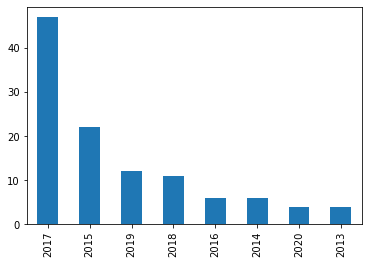

In [5]:
#plotting
df.Year.value_counts().plot(kind = 'bar')


<AxesSubplot:>

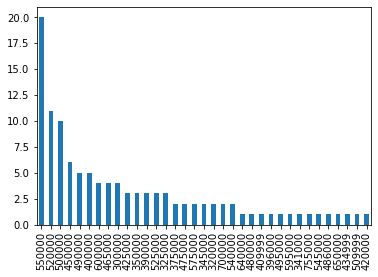

In [6]:
df.Price.value_counts().plot(kind = 'bar')

In [7]:
#groping the data on the basis of year ,price  and frequency
df.groupby('Year')[['Price']].value_counts()

Year  Price 
2013  345000     2
      320000     1
      325000     1
2014  400000     2
      300000     1
      341000     1
      390000     1
      450000     1
2015  300000     3
      400000     3
      450000     2
      490000     2
      390000     2
      350000     2
      325000     2
      425000     2
      320000     1
      409999     1
      434999     1
      465000     1
2016  350000     1
      375000     1
      396000     1
      420000     1
      425000     1
      550000     1
2017  550000    15
      520000    11
      500000     4
      490000     3
      540000     2
      575000     2
      525000     2
      595000     1
      480000     1
      509999     1
      495000     1
      375000     1
      450000     1
      475000     1
      486000     1
2018  465000     3
      450000     2
      500000     2
      550000     2
      475000     1
      600000     1
2019  500000     4
      550000     2
      600000     2
      700000     1
      755000     1

In [8]:
y = df["Price"] ##define dependent variable

In [9]:
y = np.array([y])

In [10]:
x1 =df["Year"]  ##define independent variable
n = np.size(x1)

In [11]:
n     ##total number

112

In [12]:
x1=np.array([x1])

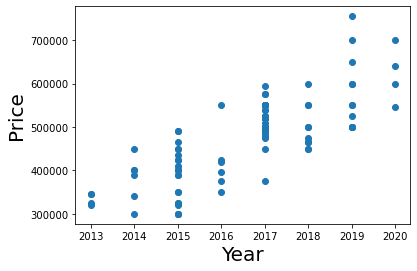

In [13]:
## scatter plot for finding correlation

plt.scatter(x1,y)
 
plt.xlabel("Year", fontsize = 20)
 
plt.ylabel("Price", fontsize = 20)
 
plt.show()

In [14]:
#finding the values for the equations of slope and intercept
x_mean = np.mean(x1)
y_mean = np.mean(y)
Sxy = np.sum(x1*y)- n*x_mean*y_mean
Sxx = np.sum(x1*x1)- n*x_mean*x_mean

In [15]:
#find slope and intercept
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('slope b1 is', b1)
print('intercept b0 is', b0)

slope b1 is 43453.379885397146
intercept b0 is -87147246.04977676


Text(0, 0.5, 'Dependent variable y')

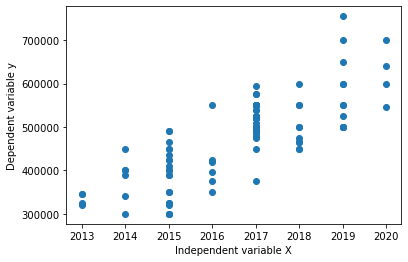

In [16]:
#ploting dpendent and independent variable
plt.scatter(x1,y)
plt.xlabel('Independent variable X')
plt.ylabel('Dependent variable y')

In [17]:
#define b1,x1,b0
y_pred = b1 * x1 + b0
b1=43453.379885397146
b0=-87147246.04977676
x2=2022

In [18]:
#  here we are predicting value of car price in the year 2022, x2=2022
y_pred = b1 * x2 + b0
y_pred

715488.0784962624

In [19]:
## possible price of a 2022 model second-hand grand i10 is 715488.0784962624

In [20]:
# Create linear regression object
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [21]:
# Split the data into training/testing sets
X = df[:-20]
X_train = df[:-20]
y = df[:-20]
y_train = df[:-20]

In [22]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [23]:
# Make predictions using the testing set
y_pred = regr.predict(X)

In [24]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, y_pred))

Coefficients: 
 [[ 1.00000000e+00  0.00000000e+00]
 [-9.77264559e-12  1.00000000e+00]]
Mean squared error: 0.00
Coefficient of determination: 1.00


In [25]:
#create lasso regression model
clf = linear_model.Lasso(alpha=0.1)

In [26]:
clf.fit(X,y)

Lasso(alpha=0.1)

In [27]:
print(clf.coef_)

[[9.07929912e-01 1.25288812e-06]
 [0.00000000e+00 1.00000000e+00]]


In [28]:
print(clf.intercept_)

[1.85066713e+02 6.74556941e-06]
